# 주성분 분석 PCA ; principal component analysis
가장 대표적인 차원 축소(dimensionality reduction) 알고리즘  
특성을 압축해 데이터 크기를 줄이기 위해 사용한다.  
과대적합문제 해결과 계산속도 향상 등을 위해서도 쓸 수 있다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-04-05 00:34:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-05 00:34:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-05 00:34:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('/content/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    
    # 한 줄에 10개씩 이미지 그리기
    # 전체 행 개수 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),
                            squeeze=False) # 압축 수행하지 않음
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그리기
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

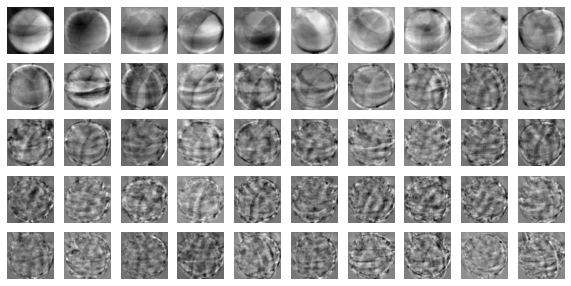

In [6]:
draw_fruits(pca.components_.reshape(-1,100,100))

## PCA를 이용한 차원 축소

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


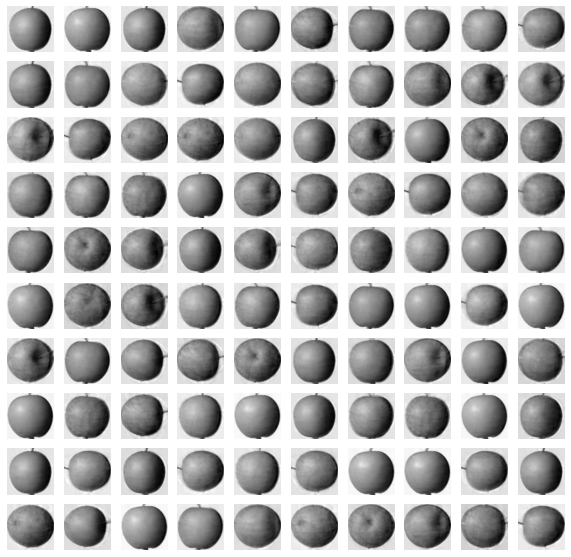

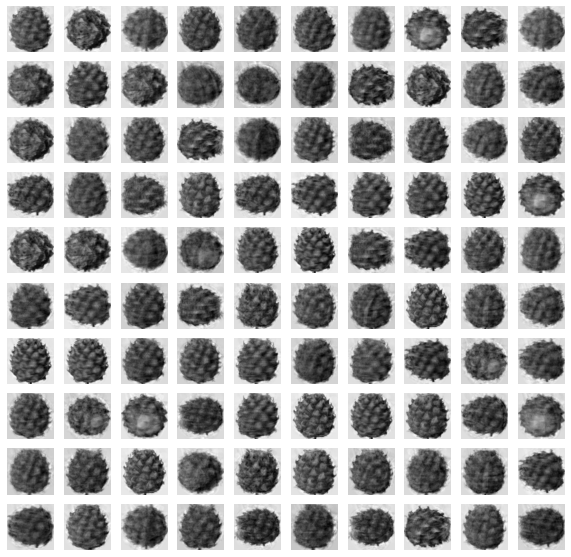

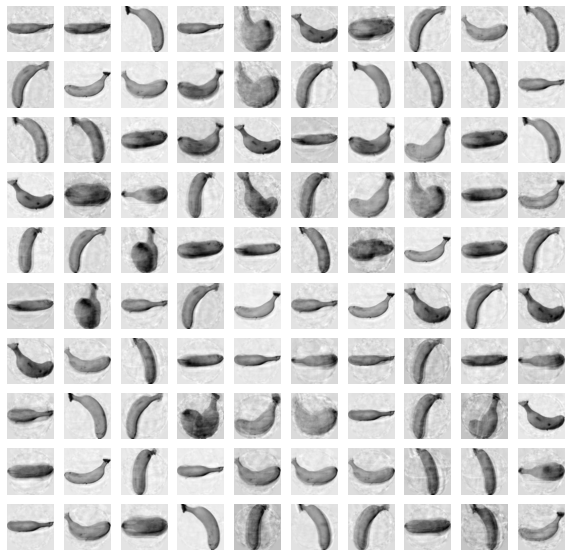

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

## 설명된 분산 explained variance
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [11]:
print(np.sum(pca.explained_variance_ratio_)) # 총 분산 비율

0.9214261007148192


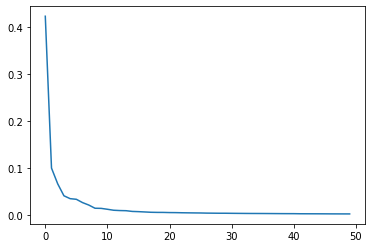

In [12]:
plt.plot(pca.explained_variance_ratio_) # 각 주성분의 설명된 분산 비율
plt.show()

In [13]:
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511202
 0.00486379 0.00480347 0.00447835 0.00437314 0.00408038 0.00389465
 0.00372436 0.00359289 0.00331417 0.00317843 0.00304311 0.0030354
 0.00288879 0.00275778 0.00264845 0.00255732 0.00252106 0.00247171
 0.0023952  0.00230813 0.00222067 0.00216449 0.00213985 0.0019624
 0.00191038 0.00187752 0.00184047 0.00179354 0.00169784 0.00166931
 0.0016218  0.0016043 ]


## 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100) # 필터역확 x*0=0, x*1=x

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 훈련에 걸린 시간

0.9966666666666667
1.7637757778167724


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.053504228591918945


정확도가 증가하고 훈련시간이 감소했다.

## 주성분클래스 생성 시  **개수** 대신 **설명된 분산의 비율** 입력
n_components를 0~1로 입력

In [35]:
pca = PCA(n_components=0.9)
pca.fit(fruits_2d)

PCA(n_components=0.9)

In [26]:
print(pca.n_components_)

39


In [38]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [39]:
print(pca.n_components_)

2


In [40]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [41]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05042867660522461


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=24)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


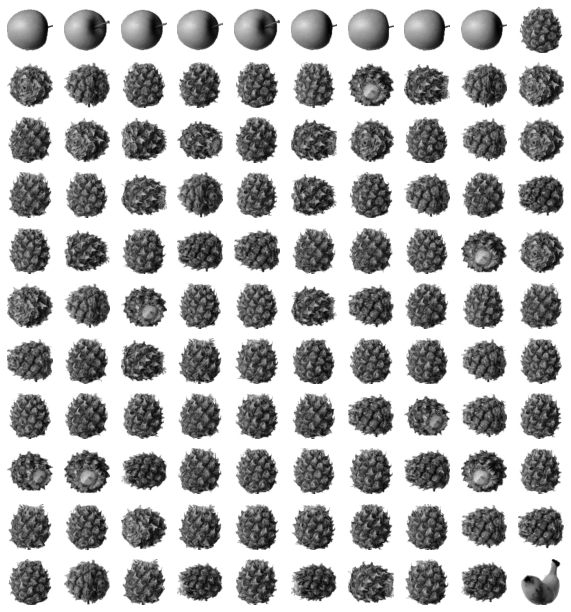

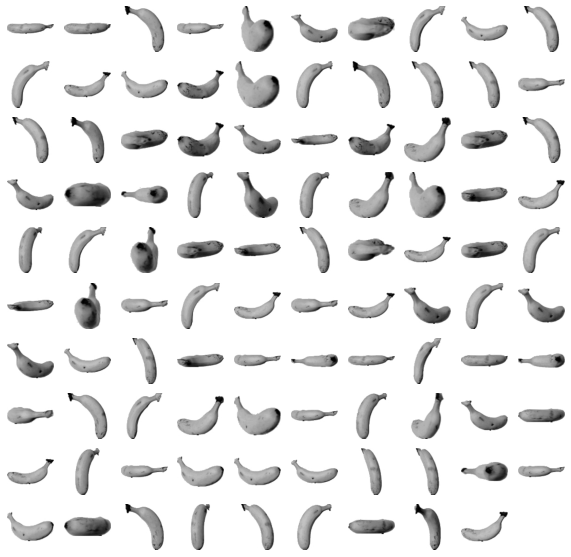

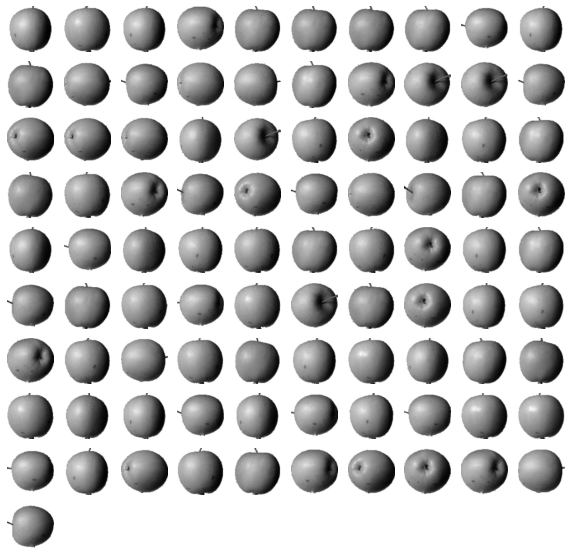

In [43]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label]) 
    print()

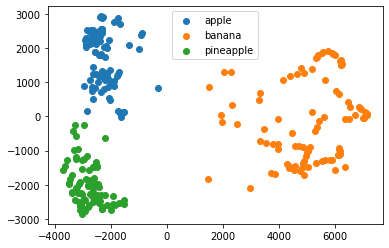

In [44]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
    
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

특성을 2개만 사용했기때문에 시각화가 가능해졌다.